In [1]:
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

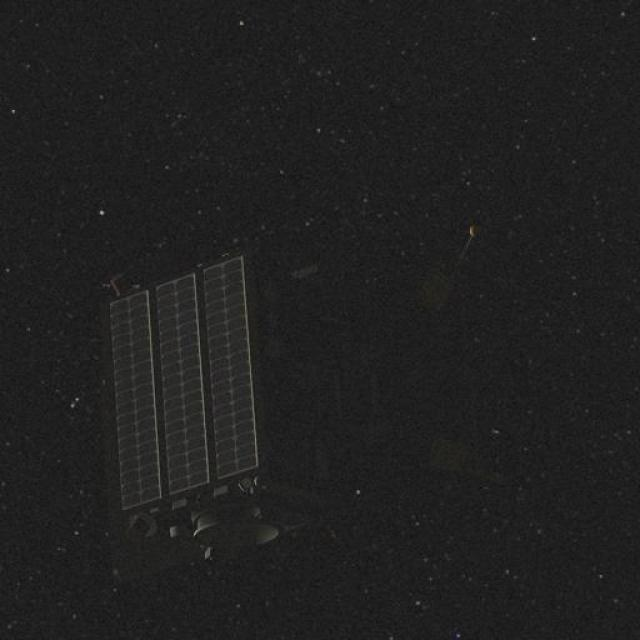

In [2]:
image= PIL.Image.open('/kaggle/input/space-debris-detection-dataset-for-yolov8/train/images/img000008_jpg.rf.2c95cb6fb03fec5dc092c669adab86ea.jpg')
image

In [3]:
np.array(image.size)

array([640, 640])

In [4]:
pip install ultralytics opencv-python numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 35.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
a=open('data.yaml','w')

In [7]:
a.write('''
path: /kaggle/input/space-debris-detection-dataset-for-yolov8
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 11
names: ['cheops', 'debris', 'double_start', 'earth_observation_sat_1', 'lisa_pathfinder', 'proba_2', 'proba_3_csc', 'proba_3_ocs', 'smart_1', 'soho', 'xmm_newton']

roboflow:
  workspace: woah-noah
  project: space-debris-mugw2
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/woah-noah/space-debris-mugw2/dataset/2''')

473

In [8]:
a.close()

In [9]:
from ultralytics import YOLO

# Initialize the model (using the nano version for speed; switch to yolov8s, yolov8m, etc. if needed)
model = YOLO("yolov8n.yaml")

# Train the model using the data.yaml file
model.train(data="data.yaml", epochs=50, imgsz=640, batch=16)


Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 50.4MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 197MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/space-debris-detection-dataset-for-yolov8/train/labels... 2105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2105/2105 [00:06<00:00, 336.73it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/space-debris-detection-dataset-for-yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/space-debris-detection-dataset-for-yolov8/valid/labels... 239 images, 0 backgrounds, 0 corrupt: 100%|██████████| 239/239 [00:00<00:00, 249.88it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/space-debris-detection-dataset-for-yolov8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.37G      3.095      5.152      4.237         15        640: 100%|██████████| 132/132 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]

                   all        239        239    0.00451       0.21     0.0162    0.00588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.33G       2.94      4.634      3.658         15        640: 100%|██████████| 132/132 [00:24<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.01it/s]

                   all        239        239    0.00438      0.714     0.0271    0.00793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.32G      2.681      4.209      3.261         17        640: 100%|██████████| 132/132 [00:24<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.79it/s]

                   all        239        239      0.173      0.114     0.0679     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.33G       2.41      3.888      2.972         18        640: 100%|██████████| 132/132 [00:23<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        239        239      0.216     0.0872     0.0567      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.33G      2.248      3.611      2.757         23        640: 100%|██████████| 132/132 [00:23<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]

                   all        239        239      0.424       0.21       0.14      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.33G      2.148      3.474      2.651         16        640: 100%|██████████| 132/132 [00:24<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.12it/s]

                   all        239        239      0.662      0.126      0.217     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.33G      2.049       3.27      2.541         15        640: 100%|██████████| 132/132 [00:24<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.83it/s]

                   all        239        239       0.36      0.228      0.203      0.088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G      1.994      3.226      2.501         26        640: 100%|██████████| 132/132 [00:24<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]

                   all        239        239      0.398      0.236      0.234      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.34G      1.952      3.049       2.44         13        640: 100%|██████████| 132/132 [00:23<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]

                   all        239        239      0.219      0.317      0.233     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.33G      1.944      2.995      2.431         17        640: 100%|██████████| 132/132 [00:24<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.93it/s]

                   all        239        239      0.349      0.208      0.196     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.33G      1.909      2.867      2.414         19        640: 100%|██████████| 132/132 [00:24<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.03it/s]

                   all        239        239      0.456      0.445        0.4      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.33G      1.888       2.78      2.375         15        640: 100%|██████████| 132/132 [00:24<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]

                   all        239        239       0.36      0.287      0.321       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.33G      1.859      2.718      2.353         19        640: 100%|██████████| 132/132 [00:24<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.95it/s]

                   all        239        239      0.467      0.406      0.415      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.33G      1.862      2.661      2.346         15        640: 100%|██████████| 132/132 [00:24<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]

                   all        239        239      0.468      0.431      0.441      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.34G      1.804      2.542      2.289         16        640: 100%|██████████| 132/132 [00:24<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.91it/s]

                   all        239        239      0.483      0.561      0.475      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.33G      1.828      2.523      2.299         13        640: 100%|██████████| 132/132 [00:24<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.00it/s]

                   all        239        239      0.413      0.369      0.349       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.33G      1.795      2.468      2.275         20        640: 100%|██████████| 132/132 [00:24<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.09it/s]

                   all        239        239      0.545      0.506       0.54      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.33G      1.766      2.427      2.252         21        640: 100%|██████████| 132/132 [00:24<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.11it/s]

                   all        239        239      0.474       0.49      0.403      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.33G      1.761      2.343      2.247         21        640: 100%|██████████| 132/132 [00:24<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]

                   all        239        239      0.798      0.223      0.321      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.37G       1.77      2.343      2.246          8        640: 100%|██████████| 132/132 [00:24<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]

                   all        239        239      0.502       0.55      0.572      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.33G      1.772       2.32      2.242         19        640: 100%|██████████| 132/132 [00:23<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]

                   all        239        239      0.546      0.541      0.575      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.34G      1.777      2.317      2.233         13        640: 100%|██████████| 132/132 [00:24<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.07it/s]

                   all        239        239      0.661      0.571      0.615      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.33G      1.756      2.222      2.232         15        640: 100%|██████████| 132/132 [00:24<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.24it/s]

                   all        239        239      0.641      0.535      0.631      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.33G      1.741      2.185      2.199         22        640: 100%|██████████| 132/132 [00:24<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.96it/s]

                   all        239        239      0.555      0.493      0.565      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.33G      1.733        2.2      2.203         24        640: 100%|██████████| 132/132 [00:24<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.81it/s]

                   all        239        239      0.578      0.605      0.645      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.33G      1.719      2.154      2.197         16        640: 100%|██████████| 132/132 [00:23<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.91it/s]

                   all        239        239      0.533      0.666      0.639      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.33G      1.728      2.113      2.185         15        640: 100%|██████████| 132/132 [00:24<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]

                   all        239        239      0.517      0.625      0.651      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.33G      1.704      2.087      2.163         13        640: 100%|██████████| 132/132 [00:24<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.09it/s]

                   all        239        239      0.681      0.642      0.683      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.33G      1.698      2.053      2.169         19        640: 100%|██████████| 132/132 [00:24<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]

                   all        239        239      0.537      0.647      0.688      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.33G      1.693      2.066      2.162         25        640: 100%|██████████| 132/132 [00:24<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.00it/s]

                   all        239        239      0.564      0.588       0.61      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.33G      1.685      1.991       2.15         19        640: 100%|██████████| 132/132 [00:24<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]

                   all        239        239      0.739       0.58      0.698       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.33G      1.683      1.985      2.144         15        640: 100%|██████████| 132/132 [00:24<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.83it/s]

                   all        239        239      0.718      0.658      0.733      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.33G      1.656      1.946       2.13         14        640: 100%|██████████| 132/132 [00:24<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        239        239      0.656      0.624       0.71      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.37G       1.66      1.947      2.138         15        640: 100%|██████████| 132/132 [00:24<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]

                   all        239        239       0.66      0.668      0.749      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.33G      1.666      1.939       2.13         21        640: 100%|██████████| 132/132 [00:24<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]

                   all        239        239      0.727      0.652      0.742       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.37G      1.636      1.898      2.103         16        640: 100%|██████████| 132/132 [00:24<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.23it/s]

                   all        239        239      0.678      0.655      0.754      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.33G      1.644      1.888      2.114         17        640: 100%|██████████| 132/132 [00:24<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.97it/s]

                   all        239        239      0.758      0.659      0.772      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.33G      1.638      1.879      2.108         20        640: 100%|██████████| 132/132 [00:24<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.00it/s]

                   all        239        239      0.694      0.718      0.776      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.33G      1.638      1.871      2.102         23        640: 100%|██████████| 132/132 [00:24<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.01it/s]

                   all        239        239      0.725      0.721      0.801      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.33G      1.641      1.847      2.097         16        640: 100%|██████████| 132/132 [00:24<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.95it/s]

                   all        239        239      0.729      0.701      0.796      0.425


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.37G      1.557      1.536      2.156          9        640: 100%|██████████| 132/132 [00:24<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.03it/s]

                   all        239        239      0.805      0.687      0.805      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.37G      1.542      1.412      2.142          9        640: 100%|██████████| 132/132 [00:23<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]

                   all        239        239      0.763      0.718       0.78      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.37G      1.516      1.357      2.132          9        640: 100%|██████████| 132/132 [00:23<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]

                   all        239        239      0.756      0.733      0.809      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.37G      1.509      1.339      2.115          9        640: 100%|██████████| 132/132 [00:23<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]

                   all        239        239      0.775      0.684      0.778      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.37G      1.492      1.313      2.103          9        640: 100%|██████████| 132/132 [00:23<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.12it/s]

                   all        239        239      0.738       0.76      0.827       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.37G       1.47      1.279      2.078          9        640: 100%|██████████| 132/132 [00:23<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.94it/s]

                   all        239        239      0.826      0.714      0.836      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.37G      1.456       1.25      2.073          9        640: 100%|██████████| 132/132 [00:23<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.26it/s]

                   all        239        239      0.797      0.732      0.835      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.37G      1.444      1.234      2.059          9        640: 100%|██████████| 132/132 [00:23<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.92it/s]

                   all        239        239      0.823      0.692      0.823      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.37G      1.439      1.212      2.061          9        640: 100%|██████████| 132/132 [00:23<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.94it/s]

                   all        239        239      0.738      0.775      0.835      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.37G       1.42      1.199      2.033          9        640: 100%|██████████| 132/132 [00:24<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]

                   all        239        239      0.751      0.764      0.838      0.465



50 epochs completed in 0.365 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]


                   all        239        239      0.749      0.761      0.837      0.465
                cheops         19         19      0.807      0.882      0.918      0.582
                debris         21         21      0.809      0.809      0.898      0.424
          double_start         21         21      0.935      0.905      0.946      0.615
earth_observation_sat_1         22         22      0.593      0.596      0.719      0.415
       lisa_pathfinder         21         21      0.792      0.952      0.927       0.59
               proba_2         20         20      0.736       0.85      0.859      0.485
           proba_3_csc         24         24       0.79      0.939      0.953      0.537
           proba_3_ocs         21         21      0.718      0.714       0.82      0.428
               smart_1         23         23      0.536      0.435      0.501      0.183
                  soho         23         23      0.869      0.577       0.84      0.455
            xmm_newt

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b6b7922e2c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [10]:
results = model.val(data="data.yaml")
print(results)

Ultralytics 8.3.71 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/space-debris-detection-dataset-for-yolov8/valid/labels... 239 images, 0 backgrounds, 0 corrupt: 100%|██████████| 239/239 [00:00<00:00, 620.15it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/space-debris-detection-dataset-for-yolov8/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.63it/s]


                   all        239        239      0.751      0.764      0.838      0.464
                cheops         19         19      0.808      0.885      0.918      0.582
                debris         21         21      0.808       0.81      0.895      0.421
          double_start         21         21      0.933      0.905      0.947      0.615
earth_observation_sat_1         22         22      0.592      0.594      0.721      0.417
       lisa_pathfinder         21         21      0.792      0.952      0.926      0.589
               proba_2         20         20      0.737       0.85      0.861      0.482
           proba_3_csc         24         24       0.79       0.94      0.953      0.537
           proba_3_ocs         21         21      0.723      0.747      0.828      0.425
               smart_1         23         23       0.56      0.435      0.504      0.184
                  soho         23         23      0.869      0.578       0.84      0.455
            xmm_newt

Result files: ['img011039_jpg.rf.bb13bb748b591c749acd83529a662b8f.jpg']


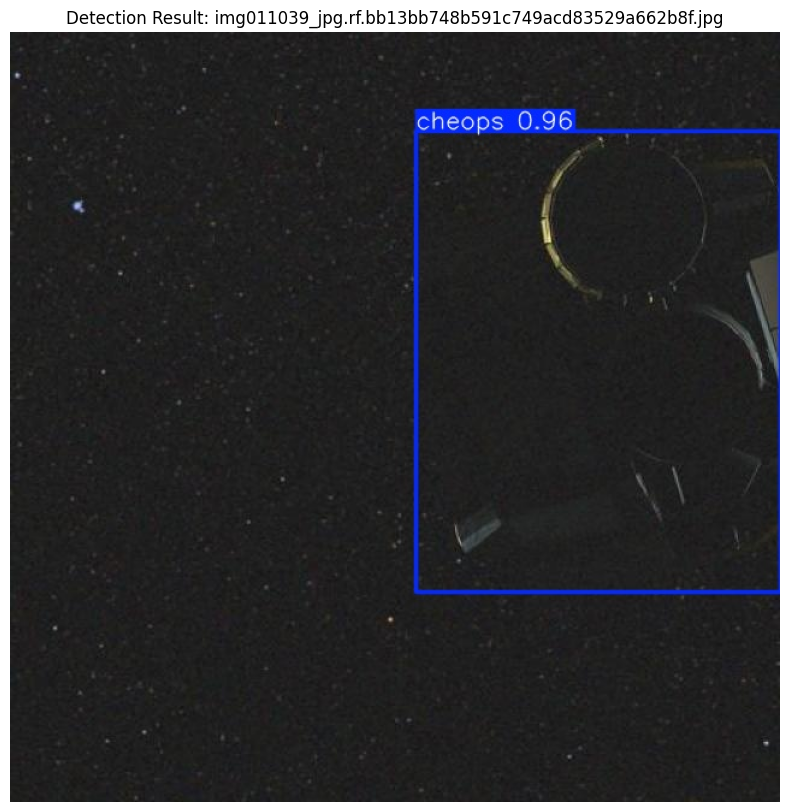

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

result_dir = "runs/detect/train3"  
files = os.listdir(result_dir)
print("Result files:", files)

img_file = [f for f in files if f.endswith((".jpg", ".png"))][0]
img_path = os.path.join(result_dir, img_file)

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title(f"Detection Result: {img_file}")
plt.axis('off')
plt.show()
